In [ ]:
#print(y)
#ceros = convolucion(y, 1, 64)
#plt.figure(figsize=(20,10))
#plt.plot(ceros)
#plt.show()

In [ ]:
# Con escala en enteros
#plt.figure(figsize=(20,10))
#plt.plot(yy[iz:de], color = "red")
#plt.show()
# Con escala en enteros
#plt.figure(figsize=(20,10))
#plt.plot(yy, color = "red")
#plt.show()
#print(len(yy))


In [ ]:
#pendiente = (yy[de]-yy[iz])/(de-iz)
#ordenada_o = pendiente*iz - yy[iz]
#plt.figure(figsize=(20,10))
#plt.plot(yy)
#plt.plot([iz, de], [yy[iz], yy[de]])

In [2]:
# Importa bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.signal import argrelextrema

In [3]:
# abrimos el archivo y obtenemos las columnas que nos itneresan
# Se baso en la siguiente pagina web: https://realpython.com/python-csv/
def leer_archivo(nombre):
    #Hay que analizar las primeras 3 renglones por separado.
    #a, b seran los extremos del intervalo en Hz
    
    arch = open(nombre, "r")
    if arch.mode == 'r':
        contenido = arch.read()
        contenido = contenido.split("\n")
        tam = int(contenido[0].split(": ")[1])
        [a, b] = contenido[2].split(": ")[1].split(" ")

        yy = np.zeros(tam)
        for i in range(0, tam):
            yy[i] = int(float(contenido[i+3]))
            
    else:
        print("No existe el archivo")
    
    return [yy, float(a), float(b)]

In [4]:
def aplicar(x, y, m):
    # El tama;o de x tiene que ser del tama;o de y mas m
    #x y y son arreglos
    x_new = np.copy(x)
    for i in range(0, len(y)):
        x_new[m+i] += y[i]
    return x_new

In [5]:
def convolucion(yy, n = 40, m = 128): #que n va de 1 hasta 64
    tamano = len(yy)
    ceros = np.zeros(tamano+n*m)

    for i in range(0, m):
        ceros = aplicar(ceros, (-1)**i*yy, n*i)
    return ceros

In [6]:
#Input: yy
def integrar(yy, intervalo = 60, m = 8):
    #intervalo es el maximo valor de las n
    
    integrs = np.zeros(intervalo)
    
    for i in range(1, intervalo):
        y_new = convolucion(yy, i, m)
        integral = sum(abs(y_new))
        integrs[i] = integral
    return integrs

In [7]:
#Generando un vector con la se;al trasladada 1 vez
def trasladar(ys, n):
    # delta = xs[n]
    tam = len(ys) + n
    y_new = np.zeros(tam)
    
    for i in range( 0, tam ):
        if i < len(ys):
            y_new[i] += ys[i]
        if i >= n:
            y_new[i] += -ys[i-n]
    return y_new    

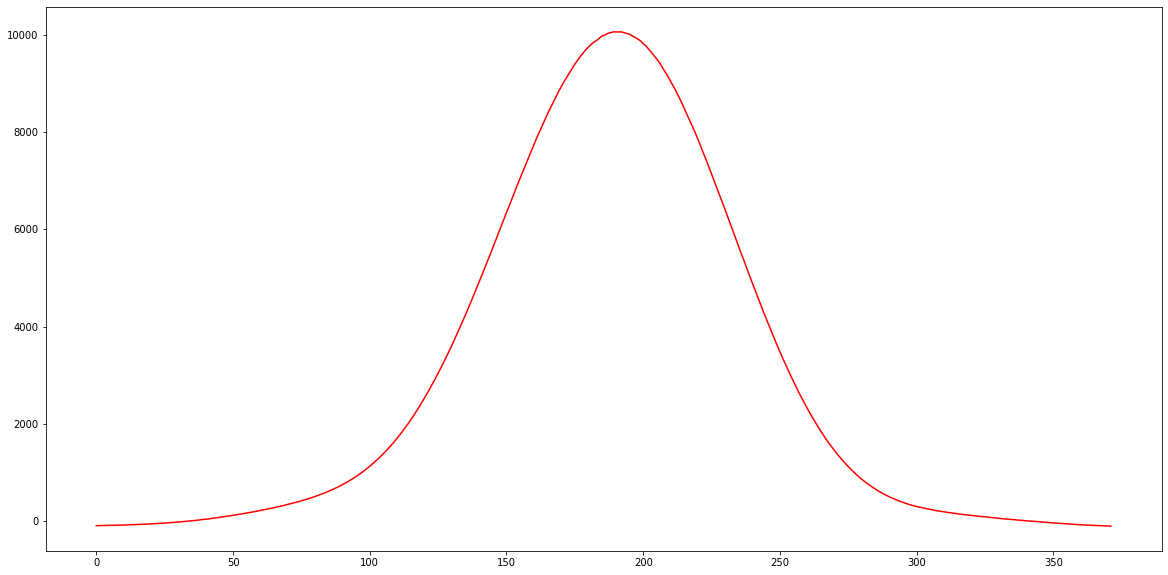

372


In [8]:
yy, a, b = leer_archivo('ha_09.slc')
# Con escala en enteros
plt.figure(figsize=(20,10))
plt.plot(yy, color = "red")
#plt.plot([iz, de], [yy[iz], yy[de]])
plt.show()
print(len(yy))

371


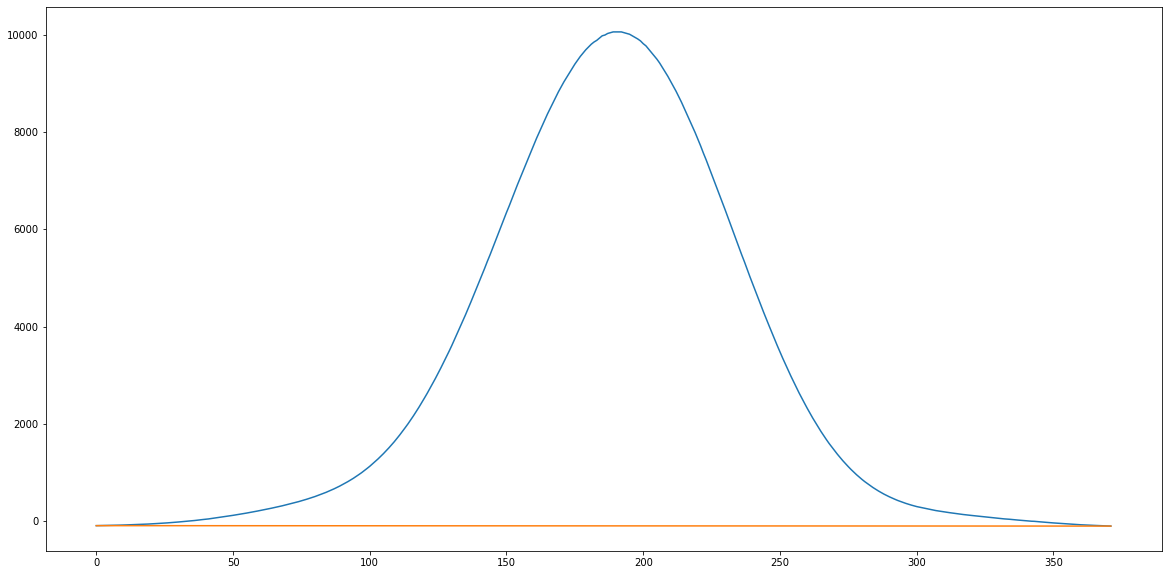

In [9]:
print(list(yy).index(min(yy)))
#Eliminación de regiones sin ajuste de línea base
iz = 0
de = 799
if de > len(yy):
    de = len(yy) - 1
pendiente = (yy[de]-yy[iz])/(de-iz)
ordenada_o = pendiente*iz - yy[iz]
plt.figure(figsize=(20,10))
plt.plot(yy)
plt.plot([iz, de], [yy[iz], yy[de]])

-0.02425876010781671 89.0 -98.0 -89.0 371 0
Minimo:  0.0


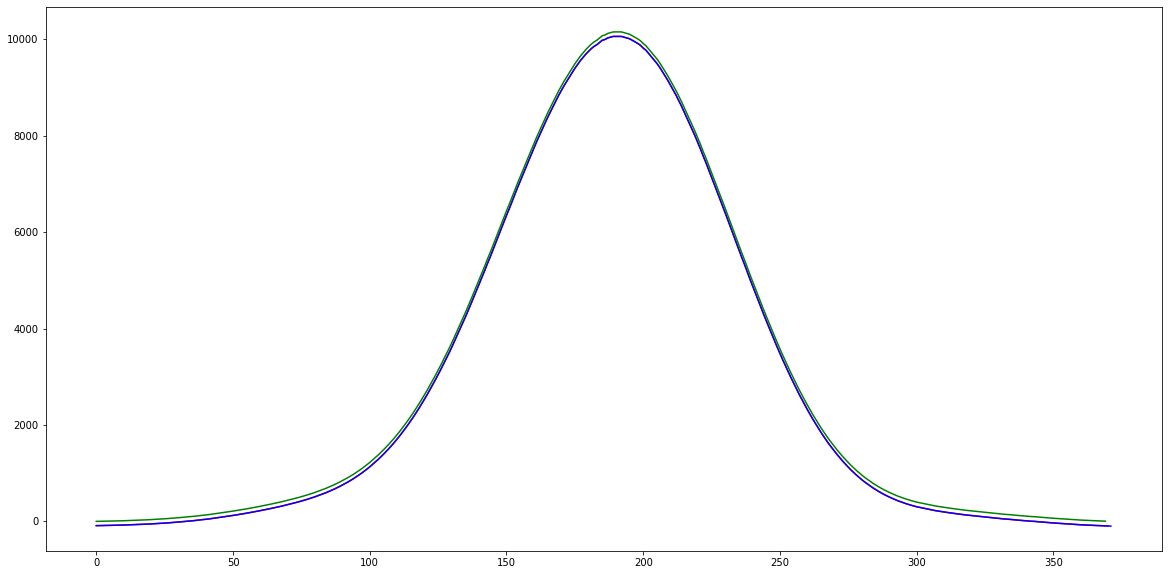

In [10]:
#Reducción de ventana y corrección de línea base"]
pendiente = (yy[de]-yy[iz])/(de-iz)
ordenada_o = pendiente*iz - yy[iz]

print(pendiente,ordenada_o, yy[de],yy[iz],de,iz)

y = np.zeros(de-iz-1)
for i in range(0, de-iz-1):
    y[i] = yy[iz+i] - (pendiente*i-ordenada_o)

print("Minimo: ", min(y))
y = y - min(y)
plt.figure(figsize=(20,10))
plt.plot(yy[iz:de], color = "red")
plt.plot(yy, color = "blue")
plt.plot(y, color = "green")
plt.show()
#print(y)

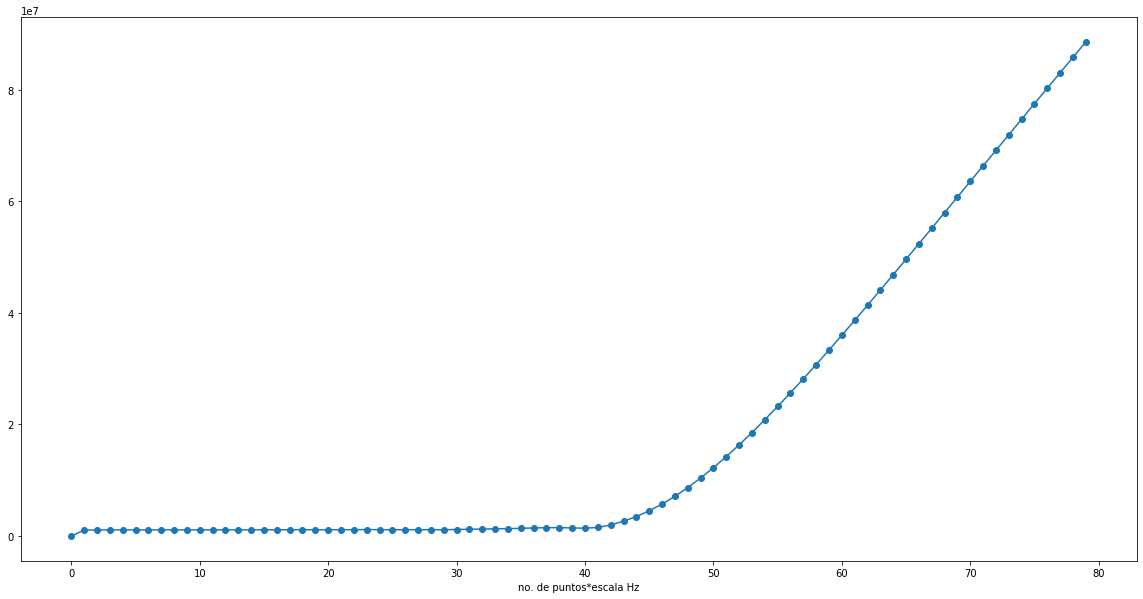

valores minimos en: [ 6  9 12 14 16 20 25 28 40]
Mínimo:  1133802.6253369346


In [11]:
# Generar la secuencia xx
paso_hz = abs(a-b)/len(yy)
xx = [i*paso_hz+min([a, b]) for i in range(0, len(yy))]

#Redefiniendo el arreglo en y
yy = yy[iz:de]
xx = xx[iz:de]
nuevo_paso_hz = (xx[-1]-xx[0])/len(yy)

# La escala en X de la siguiente figura está en enteros. Utilizar paso_Hz para convertir a Hz
intervalo = 8
m = 256
integrs = integrar(y, intervalo, m)

plt.figure(figsize=(20,10))
plt.plot(integrs, marker = 'o')
plt.title("Función de Integral")
plt.xlabel("no. de puntos*escala Hz")
plt.show()

print("valores minimos en: "+str(argrelextrema(integrs, np.less)[0]))
print("Mínimo: ", integrs[19])

In [12]:
#Seleccionar el mínimo deseado para que se determine la J.¶
print("Jota: ",  53*paso_hz, "        Resolución Digital", paso_hz,)

Jota:  9.21094266129042         Resolución Digital 0.1737913709677438


In [13]:
# Codigo para 2 maximos
#maximo = max(argrelextrema(integrs, np.less)[0])
#print(maximo*delta_e)

# Note que el valor anterior debe corresponder con la diferencia entre los dos maximos originales
#print(xx[max2] - xx[max1])

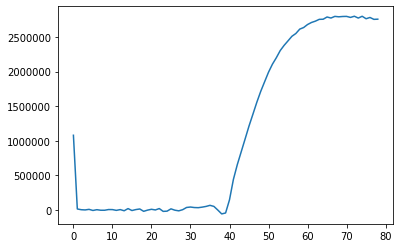

In [14]:
#pprueba para determinar LOD

deriv = np.diff(integrs)
plt.plot(deriv)